In [10]:
from google.colab import files


uploaded = files.upload()


Saving Credit_Data.csv to Credit_Data.csv


In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')


In [16]:
df= pd.read_csv("Credit_Data.csv")

In [17]:
df

,ID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331
...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,12.096,4100,307,3,32,13,Male,No,Yes,Caucasian,560
396,397,13.364,3838,296,5,65,17,Male,No,No,African American,480
397,398,57.872,4171,321,5,67,12,Female,No,Yes,Caucasian,138
398,399,37.728,2525,192,1,44,13,Male,No,Yes,Caucasian,0


In [18]:
df.head()

,ID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [20]:
df.describe()

,ID,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000
std,115.614301,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877
min,1.000000,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000
25%,100.750000,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000
50%,200.500000,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000
75%,300.250000,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000
max,400.000000,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000


In [21]:
df.columns

Index(['ID', 'Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education',
       'Gender', 'Student', 'Married', 'Ethnicity', 'Balance'],
      dtype='object')

In [22]:
df.tail()

,ID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
395,396,12.096,4100,307,3,32,13,Male,No,Yes,Caucasian,560
396,397,13.364,3838,296,5,65,17,Male,No,No,African American,480
397,398,57.872,4171,321,5,67,12,Female,No,Yes,Caucasian,138
398,399,37.728,2525,192,1,44,13,Male,No,Yes,Caucasian,0
399,400,18.701,5524,415,5,64,7,Female,No,No,Asian,966


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         400 non-null    int64  
 1   Income     400 non-null    float64
 2   Limit      400 non-null    int64  
 3   Rating     400 non-null    int64  
 4   Cards      400 non-null    int64  
 5   Age        400 non-null    int64  
 6   Education  400 non-null    int64  
 7   Gender     400 non-null    object 
 8   Student    400 non-null    object 
 9   Married    400 non-null    object 
 10  Ethnicity  400 non-null    object 
 11  Balance    400 non-null    int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 37.6+ KB


In [27]:
df.shape

(400, 12)

In [28]:
df.ndim

2

In [30]:
df.isnull().sum()

ID           0
Income       0
Limit        0
Rating       0
Cards        0
Age          0
Education    0
Gender       0
Student      0
Married      0
Ethnicity    0
Balance      0
dtype: int64

In [33]:
df.duplicated().sum()

0

<Axes: ylabel='Income'>

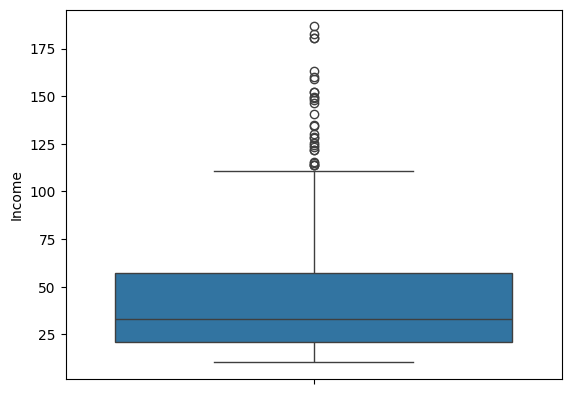

In [34]:
sns.boxplot(df.Income ) #for visualizing the distribution of outliers

<Axes: ylabel='Cards'>

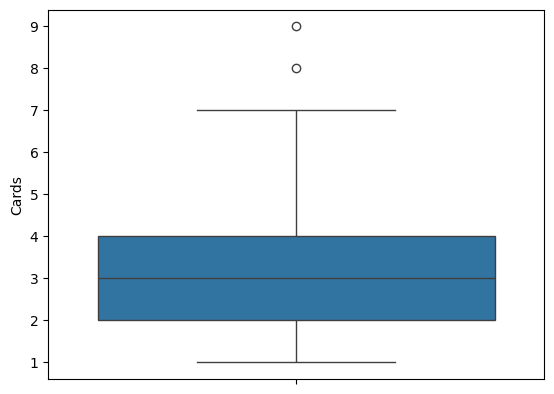

In [35]:
sns.boxplot(df.Cards)

In [37]:
for i in df.select_dtypes(include="object").columns:
     print(df[i].value_counts())
     print("-----"*10)


Gender
Female    207
Male      193
Name: count, dtype: int64
--------------------------------------------------
Student
No     360
Yes     40
Name: count, dtype: int64
--------------------------------------------------
Married
Yes    245
No     155
Name: count, dtype: int64
--------------------------------------------------
Ethnicity
Caucasian           199
Asian               102
African American     99
Name: count, dtype: int64
--------------------------------------------------


In [38]:
# Define the mapping from Ethnicity names to numbers
Ethnicity_map = {
    "Caucasian": 1, "Asian": 2, "African American ": 3
}
df['Ethnicity'] = df['Ethnicity'].map(Ethnicity_map)

In [39]:
x= LabelEncoder()

In [40]:
#encode data in columns(gender, student, married, ethnicity)
encoder = LabelEncoder()

# Iterate over the columns to encode
for column in df.columns[-5:-2]:
    df[column] = encoder.fit_transform(df[column])

In [41]:
df.head()

,ID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,1,0,1,1.0,333
1,2,106.025,6645,483,3,82,15,0,1,1,2.0,903
2,3,104.593,7075,514,4,71,11,1,0,0,2.0,580
3,4,148.924,9504,681,3,36,11,0,0,0,2.0,964
4,5,55.882,4897,357,2,68,16,1,0,1,1.0,331


In [42]:
df.dropna(inplace=True)

In [43]:
scale = MinMaxScaler()

df['Income'] = scale.fit_transform(df[['Income']])
df['Limit'] = scale.fit_transform(df[['Limit']])
df['Rating'] = scale.fit_transform(df[['Rating']])
df['Cards'] = scale.fit_transform(df[['Cards']])
df['Age'] = scale.fit_transform(df[['Age']])
df['Education'] = scale.fit_transform(df[['Education']])
df['Ethnicity'] = scale.fit_transform(df[['Ethnicity']])
df['Balance'] = scale.fit_transform(df[['Balance']])

In [44]:
df.head()

,ID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,0.026321,0.208797,0.213723,0.125,0.146667,0.400000,1,0,1,0.0,0.166583
1,2,0.555020,0.442082,0.438695,0.250,0.786667,0.666667,0,1,1,1.0,0.451726
2,3,0.546712,0.475090,0.473566,0.375,0.640000,0.400000,1,0,0,1.0,0.290145
3,4,0.803892,0.661549,0.661417,0.250,0.173333,0.400000,0,0,0,1.0,0.482241
4,5,0.264123,0.307899,0.296963,0.125,0.600000,0.733333,1,0,1,0.0,0.165583


In [45]:
df.to_csv("Processed_Data")

In [ ]:
df